<a href="https://colab.research.google.com/github/miraculusik/tensorflow-deep-learning-practices/blob/main/tensorflow_cnn_practicises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

--2021-08-09 20:34:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   166MB/s    in 0.6s    

2021-08-09 20:34:40 (166 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [3]:
import zipfile

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os

for root, dirname, filename in os.walk("pizza_steak"):
  print(f"There are {len(dirname)} directories and {len(filename)} files in  '{root}'")

There are 2 directories and 1 files in  'pizza_steak'
There are 2 directories and 1 files in  'pizza_steak/train'
There are 0 directories and 750 files in  'pizza_steak/train/steak'
There are 0 directories and 750 files in  'pizza_steak/train/pizza'
There are 2 directories and 1 files in  'pizza_steak/test'
There are 0 directories and 250 files in  'pizza_steak/test/steak'
There are 0 directories and 250 files in  'pizza_steak/test/pizza'


In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def plot_random_image(target_dir, class_names):
  random_class = random.choice(class_names)
  target = target_dir + random_class

  random_img = random.sample(os.listdir(target), 1)[0]
  img = mpimg.imread(target + "/" +random_img)
  plt.imshow(img)
  plt.axis(False)
  plt.title(random_class+"\nimg shape:"+str(img.shape))

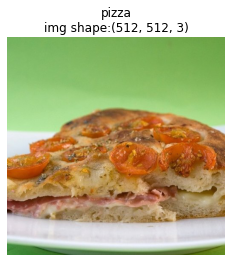

In [23]:
class_names = ["steak", "pizza"]

plot_random_image("pizza_steak/train/", class_names)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


(224, 224, 3)

(224, 224, 3)


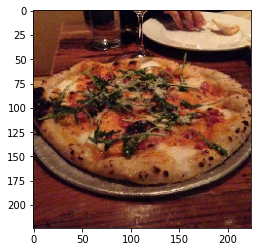

In [44]:
# 4 = batch number 
# 0 = data / 1 = labels
# 12 = image number
print(train_data[4][0][12].shape)
plt.imshow(train_data[4][0][12])

In [50]:
dense_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

dense_model.compile(loss="binary_crossentropy",
                    optimizer= tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

dense_model.fit(train_data,
                epochs=5,
                validation_data=test_data)

Epoch 1/5
47/47 [==============================] - 9s 185ms/step - loss: 2.0860 - accuracy: 0.6287 - val_loss: 0.5095 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.9228 - accuracy: 0.6880 - val_loss: 0.5869 - val_accuracy: 0.7200
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6000 - accuracy: 0.7293 - val_loss: 0.6859 - val_accuracy: 0.6680
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.5571 - accuracy: 0.7580 - val_loss: 0.5720 - val_accuracy: 0.7000
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6239 - accuracy: 0.7440 - val_loss: 0.6220 - val_accuracy: 0.7260


In [47]:
import numpy as np

def plot_model_curves(history):
  #Loss
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  #Accuracy
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  #get epoch number 
  x_range = np.arange(1,len(loss)+1)
  
  #Plot figures 
  plt.figure(figsize=(12,6))
  # figure 1 - (loss & val_loss)
  plt.subplot(121)
  plt.plot(x_range, loss, label="loss")
  plt.plot(x_range, val_loss, label="val_loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.grid(color='gray', linestyle='-', linewidth=0.5)
  # figure 2 - (accuracy & val_accuracy)
  plt.subplot(122)
  plt.plot(x_range, accuracy, label="accuracy")
  plt.plot(x_range, val_accuracy, label="val_accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuraacy")
  plt.legend()
  plt.grid(color='gray', linestyle='-', linewidth=0.5)

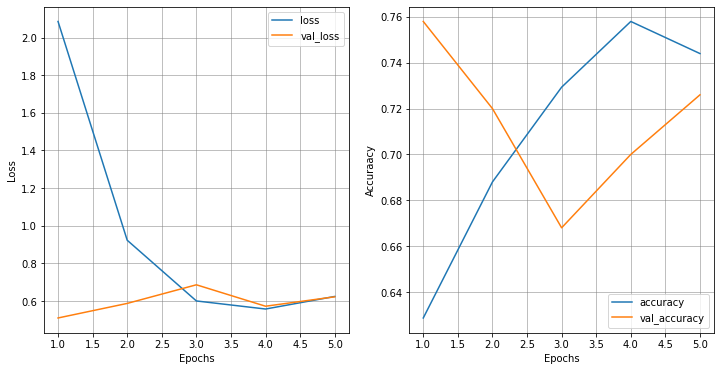

In [54]:
plot_model_curves(dense_model.history)

### CNN

In [55]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
              optimizer= tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [56]:
history = model.fit(train_data,
                    epochs=5,
                    validation_data=test_data)

Epoch 1/5
47/47 [==============================] - 10s 208ms/step - loss: 0.7415 - accuracy: 0.7053 - val_loss: 0.4668 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4458 - accuracy: 0.8100 - val_loss: 0.4460 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3339 - accuracy: 0.8753 - val_loss: 0.4193 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.1877 - accuracy: 0.9353 - val_loss: 0.3695 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.0804 - accuracy: 0.9787 - val_loss: 0.4507 - val_accuracy: 0.8140


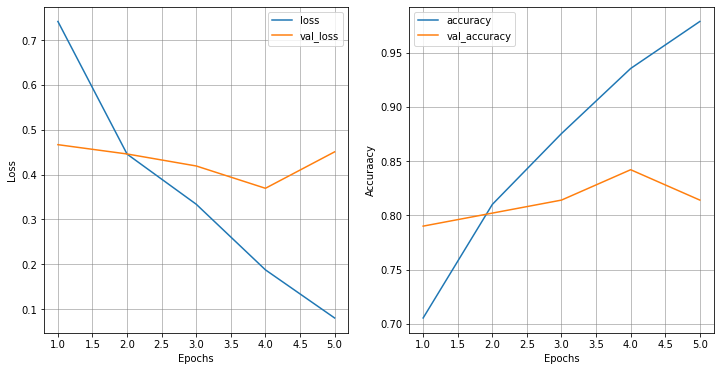

In [57]:
plot_model_curves(history)

In [59]:
model_2 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(12, 3, activation="relu", input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(12, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(24, 3, activation="relu"),
  tf.keras.layers.Conv2D(24, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
              optimizer= tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_2 = model_2.fit(train_data, 
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
47/47 [==============================] - 11s 209ms/step - loss: 0.6081 - accuracy: 0.6607 - val_loss: 0.4574 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4796 - accuracy: 0.7913 - val_loss: 0.4271 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4413 - accuracy: 0.8120 - val_loss: 0.3405 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4164 - accuracy: 0.8220 - val_loss: 0.3566 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3655 - accuracy: 0.8487 - val_loss: 0.3513 - val_accuracy: 0.8660


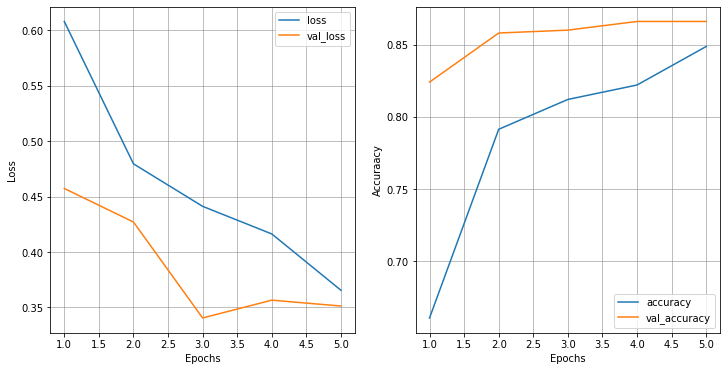

In [60]:
plot_model_curves(history_2)

In [ ]:
def (model, X, y):
  random_batch 

In [129]:
import random
class_names = ["pizza","steak"]
def plot_predict_random_image(model, test_data, class_names):
  # Plot image
  plt.figure(figsize=(8,6))
  random_image = random.randint(0, 31)
  img = test_data[0][0][random_image]
  img_label = class_names[int(test_data[0][1][random_image])]
  plt.imshow(img)
  
  # predict image
  img = tf.expand_dims(img, axis=0)
  predict = int(np.round(model.predict(img)))
  predict_label = class_names[predict]
  
  # Color of title
  if img_label == predict_label:
    color="green"
  else:
    color="red"
  
  plt.title("True Class: "+img_label + "\nPredicted Class: "+predict_label, color=color)
  
  plt.axis(False)

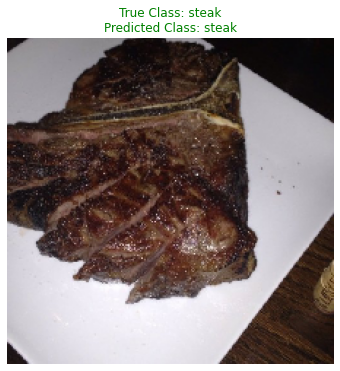

In [134]:
plot_predict_random_image(model_2, test_data, class_names)